In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
fires_df_or = pd.read_csv("forestfires.csv")

In [3]:
fires_df_or.head(n=5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#Data cleaning
null_count = fires_df_or.apply(lambda x: np.sum(x.isnull()), axis=0)
print(null_count)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [5]:
#Converting categorical data to numerical
cat_features = np.array(fires_df_or.select_dtypes(include=['object']).columns)
print(cat_features)
#Converting categorical data into numerical data
fires_df_or = pd.get_dummies(fires_df_or, columns=cat_features, 
              drop_first=True, dtype=int)

['month' 'day']


In [6]:
X = fires_df_or.drop(columns=["area"]) 
target = fires_df_or["area"]

In [7]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.33, random_state=42)

In [8]:
fires_df_or.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.003868,0.001934,0.029014,0.332689,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.062137,0.043980,0.168007,0.471632,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


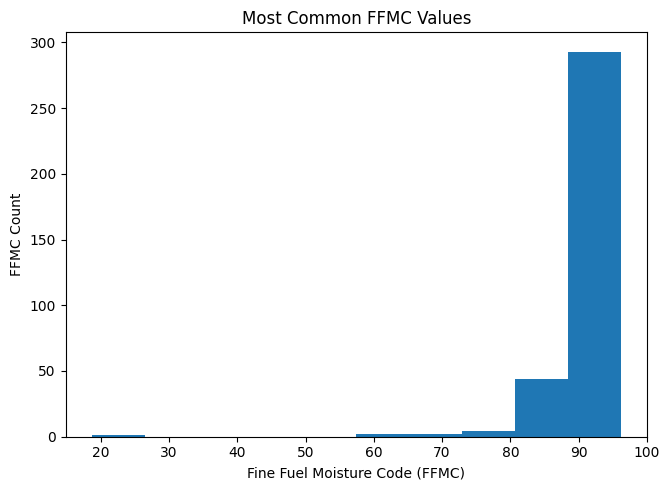

<Figure size 640x480 with 0 Axes>

In [9]:
#FFMC vs Target
plt.figure(figsize=[6.8, 5.0], layout='tight')
plt.hist(X_train['FFMC'])
plt.xlabel("Fine Fuel Moisture Code (FFMC)")
plt.ylabel("FFMC Count")
plt.title("Most Common FFMC Values")
plt.show()
plt.clf()

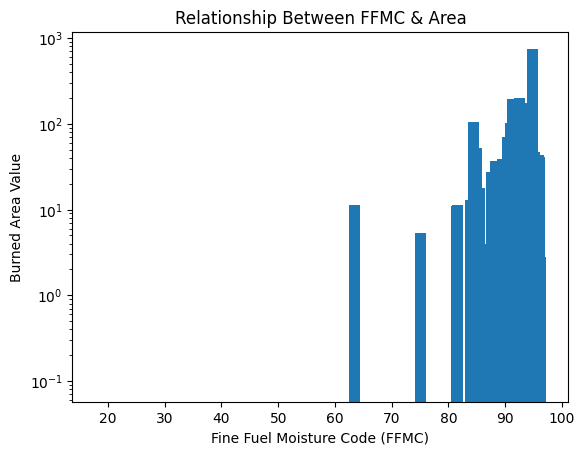

<Figure size 640x480 with 0 Axes>

In [10]:
plt.bar(X_train['FFMC'], target_train, log=True,
       width=2)
plt.xlabel("Fine Fuel Moisture Code (FFMC)")
plt.ylabel("Burned Area Value")
plt.title("Relationship Between FFMC & Area")
plt.show()
plt.clf()

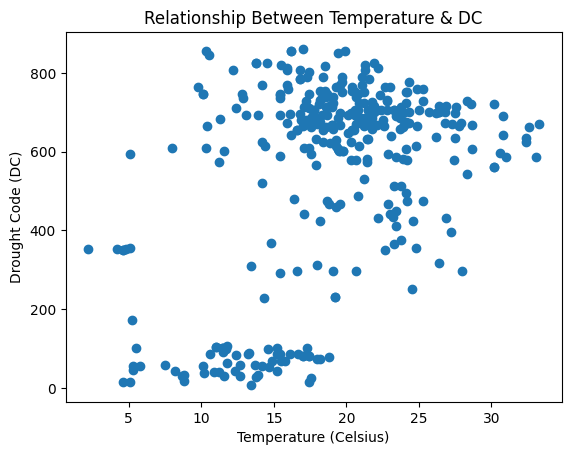

Correlation Matrix
[[3.36225176e+01 6.50111218e+02]
 [6.50111218e+02 6.25738841e+04]]


<Figure size 640x480 with 0 Axes>

In [11]:
#Relationship between Drought Code & Temperature
covariance_temp_dc = np.cov(X_train['temp'], X_train['DC'])
plt.scatter(X_train['temp'], X_train['DC'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Drought Code (DC)')
plt.title(f'Relationship Between Temperature & DC')
plt.show()
plt.clf()
print("Correlation Matrix")
print(covariance_temp_dc)

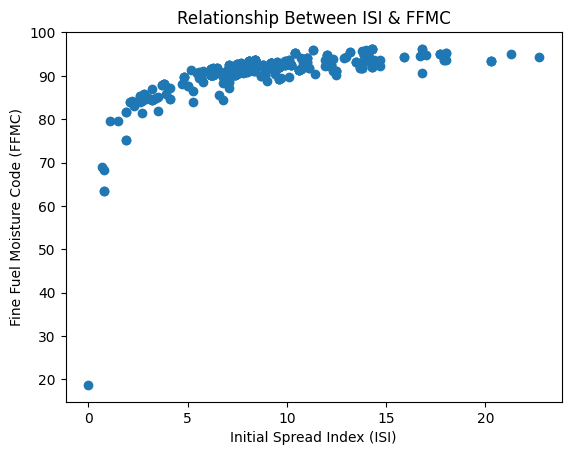

Correlation Matrix
[[15.24997906 12.99551613]
 [12.99551613 32.41205026]]


<Figure size 640x480 with 0 Axes>

In [12]:
#Relationship between FFMC & ISI
covariance_isi_ffmc = np.cov(X_train['ISI'], X_train['FFMC'])
plt.scatter(X_train['ISI'], X_train['FFMC'])
plt.xlabel('Initial Spread Index (ISI)')
plt.ylabel('Fine Fuel Moisture Code (FFMC)')
plt.title(f'Relationship Between ISI & FFMC')
plt.show()
plt.clf()
print("Correlation Matrix")
print(covariance_isi_ffmc)

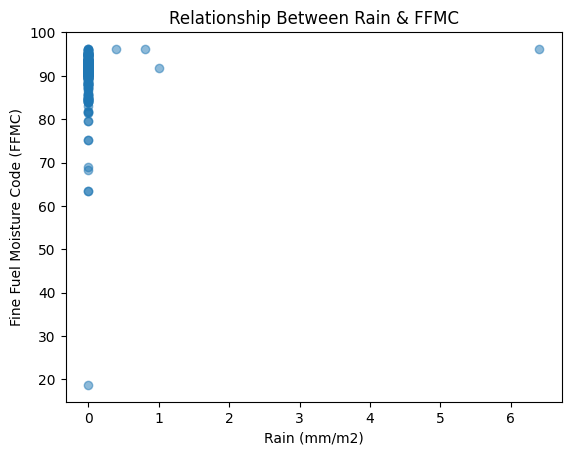

Covariance Between rain and FFMC
[[ 0.12332244  0.12443596]
 [ 0.12443596 32.41205026]]


In [13]:
#Relationship between rain and FFMC 
covariance_rain_ffmc = np.cov(X_train['rain'], X_train['FFMC'])
plt.scatter(X_train['rain'], X_train['FFMC'], alpha=0.5)
plt.xlabel('Rain (mm/m2)')
plt.ylabel('Fine Fuel Moisture Code (FFMC)')
plt.title('Relationship Between Rain & FFMC')
plt.show()
print('Covariance Between rain and FFMC')
print(covariance_rain_ffmc)

<Axes: >

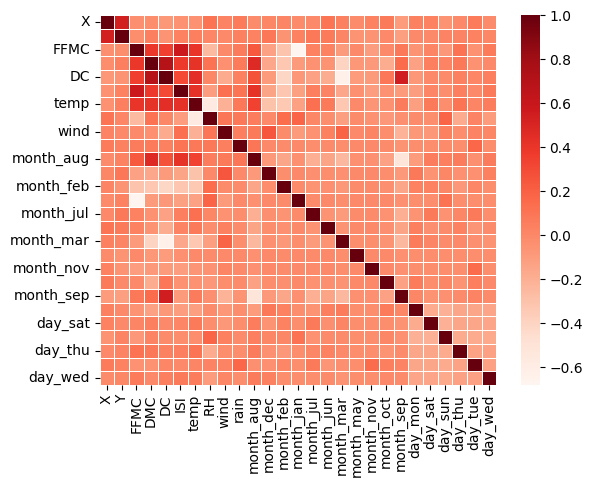

In [14]:
#General heat map for better visualization
import seaborn as sns
covariance_map = X_train.corr()
sns.heatmap(covariance_map, cmap='Reds', linewidth=0.5)

In [45]:

#Pipeline for feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression

model = SelectKBest(r_regression, k=5)
model.fit_transform(X_train, target_train)
print(model.get_support(indices=True))

#Same action with pipeline
pipeline = Pipeline([('impute', SimpleImputer()),
                     ('scaler', MinMaxScaler()),
                     ('skb', SelectKBest(r_regression, k=5)),
                     ('ln_reg', LinearRegression())])
pipeline.fit(X_train, target_train)

[ 0  1  3  6 24]


Pipeline(steps=[('impute', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('skb',
                 SelectKBest(k=5,
                             score_func=<function r_regression at 0x0000026E1780E840>)),
                ('ln_reg', LinearRegression())])

In [58]:
#Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score = pipeline.score(X_test, target_test)
print(f'Linear Regression model score: {score}')
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)
mae_train = mean_absolute_error(target_train, train_pred)
mae_test = mean_absolute_error(target_test, test_pred)
r2_score_train = r2_score(target_train, train_pred)
r2_score_test = r2_score(target_test, test_pred)

print(f'Mean Absolute Error (Training Sample): {round(mae_train, 3)}')
print(f'Mean Absolute Error (Test Sample): {round(mae_test, 3)}')
print()
print(f'R2 Error (Training Sample): {round(r2_score_train, 3)}')
print(f'R2 Error (Test Sample): {round(r2_score_test, 3)}')

Linear Regression model score: -0.0065495261850123665
Mean Absolute Error (Training Sample): 16.57
Mean Absolute Error (Test Sample): 22.093

R2 Error (Training Sample): 0.038
R2 Error (Test Sample): -0.007


In [59]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model import Lasso 
from sklearn import linear_model import Ridge 
param_grid = [{'ln_reg': [LinearRegression()], 'ln_reg__fit_intercept':[True, False]},
             {'ln_reg': [Lasso()], 'ln_reg__alpha': [1.0, 2.0, 2.5, 3.0, 4.5]},
             {'ln_reg': [Ridge()], 'ln_reg__alpha': [1.0, 2.0, 2.5, 3.0, 4.5]}]
gs_model = GridSearchCV(pipeline, param_grid,
                       scoring='neg_mean_squared_error')